In [1]:
import pymysql
import pandas as pd

In [2]:
db_config={
    'user':'root',
    'password':'12345',
    'host':'localhost',
    'database':'sales_nullclass'
}

In [3]:
queries={
    "question1a:Create datasets for sales data in 2021" :
    """ CREATE TABLE sales_2021 AS SELECT s.sku_name, SUM(o.qty_ordered) AS qty_ordered FROM
    order_detail AS o
        JOIN
    sku_detail AS s ON o.sku_id = s.id
WHERE
    category = 'Others'
        AND YEAR(o.order_date) = 2021
        AND o.is_valid = 1
GROUP BY s.sku_name;
""" ,
    "question1b: Create datasets for sales data in 2022":
    """CREATE TABLE sales_2022 AS SELECT s.sku_name, SUM(o.qty_ordered) AS qty_ordered FROM
    order_detail AS o
        JOIN
    sku_detail AS s ON o.sku_id = s.id
WHERE
    category = 'Others'
        AND YEAR(o.order_date) = 2022
        AND o.is_valid = 1
GROUP BY s.sku_name;
""",
    "question2:Merge the datasets and calculate the sales difference between 2022 and 2021.":
    """ CREATE TABLE sales_comparison AS
 SELECT COALESCE(s21.sku_name, s22.sku_name) AS sku_name,
    COALESCE(s21.qty_ordered) AS qty_ordered_2021,
    COALESCE(s22.qty_ordered) AS qty_ordered_2022,
    (COALESCE(s22.qty_ordered, 0) - COALESCE(s21.qty_ordered, 0)) AS sales_difference FROM
    sales_2021 AS s21
        JOIN
    sales_2022 AS s22 ON s21.sku_name = s22.sku_name;
SELECT 
    *
FROM
    sales_comparison
ORDER BY sales_difference desc;
""",
    "question3:Calculate the percentage change in sales and classify it as DOWN, UP, or FAIR.":
    """ ALTER TABLE sales_comparison ADD COLUMN percentage_change decimal(10,2);
ALTER TABLE sales_comparison ADD COLUMN classification varchar (15);

UPDATE sales_comparison 
SET 
    percentage_change = (sales_difference / qty_ordered_2021) * 100,
    classification = CASE
        WHEN sales_difference < 0 THEN 'DOWN'
        WHEN sales_difference > 0 THEN 'UP'
        ELSE 'FAIR'
    END;
""" ,
    "question4:Sort the products by the largest decrease in sales and show the top 20 products":
    """ SELECT 
    *
FROM
    sales_comparison
ORDER BY sales_difference DESC
LIMIT 20;
"""
}

In [4]:
from IPython.display import display

In [5]:
try:
    connection = pymysql.connect(**db_config)
    print("Database connection successful")
        
    for question, query in queries.items():
        print(f"\n--{question} ---")
        df = pd.read_sql(query, connection)
        display(df)

except Exception as e:
    print(f"an error occured:{e}")
finally:
    if connection:
        connection.close()
        print("Database connection closed")

Database connection successful

--question1a:Create datasets for sales data in 2021 ---
an error occured:Execution failed on sql ' CREATE TABLE sales_2021 AS SELECT s.sku_name, SUM(o.qty_ordered) AS qty_ordered FROM
    order_detail AS o
        JOIN
    sku_detail AS s ON o.sku_id = s.id
WHERE
    category = 'Others'
        AND YEAR(o.order_date) = 2021
        AND o.is_valid = 1
GROUP BY s.sku_name;
': (1050, "Table 'sales_2021' already exists")
Database connection closed


C:\Users\Admin\AppData\Local\Temp\ipykernel_8832\3242935909.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [6]:
import os

In [7]:
output_folder= r"C:\Users\Admin\Downloads\output_folder"
os.makedirs(output_folder, exist_ok =True)

In [8]:
tables=["order_detail","payment_detail","customer_detail","sku_detail","sales_2021","sales_2022","customer_purchase_counts"]

In [9]:
try:
    connection= pymysql.connect(**db_config)
    print("Database connection successful!")
    
    for table in tables:
        print(f"Exporting table: {table}")
        
        query= f"select * from {table};"
        
        df = pd.read_sql(query, connection)
        
        output_file= os.path.join(output_folder, f"{table}.csv")
        
        df.to_csv (output_file, index=False)
        
        print(f" Table {table} successfully exported tp {output_file}.")

except exception as e:
    print(f"an error occured: {e}")

finally:
    if connection:
        connection.close()
        print("Database connection close successfully")

C:\Users\Admin\AppData\Local\Temp\ipykernel_8832\3361295087.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


Database connection successful!
Exporting table: order_detail
 Table order_detail successfully exported tp C:\Users\Admin\Downloads\output_folder\order_detail.csv.
Exporting table: payment_detail
 Table payment_detail successfully exported tp C:\Users\Admin\Downloads\output_folder\payment_detail.csv.
Exporting table: customer_detail
 Table customer_detail successfully exported tp C:\Users\Admin\Downloads\output_folder\customer_detail.csv.
Exporting table: sku_detail
 Table sku_detail successfully exported tp C:\Users\Admin\Downloads\output_folder\sku_detail.csv.
Exporting table: sales_2021
 Table sales_2021 successfully exported tp C:\Users\Admin\Downloads\output_folder\sales_2021.csv.
Exporting table: sales_2022
 Table sales_2022 successfully exported tp C:\Users\Admin\Downloads\output_folder\sales_2022.csv.
Exporting table: customer_purchase_counts
 Table customer_purchase_counts successfully exported tp C:\Users\Admin\Downloads\output_folder\customer_purchase_counts.csv.
Database co

In [10]:
df_od = pd.read_csv("order_detail.csv")
df_pd = pd.read_csv("payment_detail.csv")
df_sd = pd.read_csv("sku_detail.csv")
df_cd = pd.read_csv("customer_detail.csv")
df_s21 = pd.read_csv("sales_2021.csv")
df_s22 = pd.read_csv("sales_2022.csv")
df_cpc = pd.read_csv("customer_purchase_counts.csv")

In [11]:
df_sd.rename(columns={'id':'sku_id'},inplace=True)
df_cd.rename(columns={'id':'customer_id'},inplace=True)
df_pd.rename(columns={'id':'payment_id'},inplace=True)
df_s21.rename(columns={'qty_ordered': 'qty_ordered_2021'}, inplace=True)
df_s22.rename(columns={'qty_ordered': 'qty_ordered_2022'}, inplace=True)

In [12]:
df=pd.DataFrame(df_od\
               .merge(df_sd, how= 'left', on='sku_id')\
               .merge(df_cd, how= 'left', on='customer_id')\
               .merge(df_pd, how= 'left', on='payment_id')\
               .merge(df_cpc, how= 'left', on='customer_id')\
               )

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5764 entries, 0 to 5763
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5764 non-null   object 
 1   customer_id      5764 non-null   object 
 2   order_date       5764 non-null   object 
 3   sku_id           5764 non-null   object 
 4   price            5764 non-null   int64  
 5   qty_ordered      5764 non-null   int64  
 6   before_discount  5764 non-null   float64
 7   discount_amount  5764 non-null   float64
 8   after_discount   5764 non-null   float64
 9   is_gross         5764 non-null   int64  
 10  is_valid         5764 non-null   int64  
 11  is_net           5764 non-null   int64  
 12  payment_id       5764 non-null   int64  
 13  sku_name         5764 non-null   object 
 14  base_price       5764 non-null   float64
 15  cogs             5764 non-null   float64
 16  category         5764 non-null   object 
 17  registered_dat

In [14]:
for x in ["order_date","registered_date"]:
    df[x] = pd.to_datetime(df[x])

In [15]:
df_others_21_22= df_s21.merge(df_s22[['sku_name','qty_ordered_2022']], how= 'left', on='sku_name')

In [16]:
df_others_21_22= df_s21.merge(df_s22[['sku_name','qty_ordered_2022']], how= 'left', on='sku_name')

df_others_21_22.fillna(0,inplace= True)
df_others_21_22['difference']= df_others_21_22['qty_ordered_2022']-df_others_21_22['qty_ordered_2021']

df_others_21_22['percent_change']= (df_others_21_22['qty_ordered_2022']-df_others_21_22['qty_ordered_2021'] / df_others_21_22['qty_ordered_2021']) * 100

In [17]:
def check(percent_change):
    if percent_change < 0:
        return 'DOWN'
    elif percent_change == 0:
        return 'FAIR'
    else:
        return 'UP'

In [18]:
df_others_21_22['remark']=df_others_21_22['percent_change'].apply(check)

df_others_21_22.sort_values(by='difference', ascending= True, inplace= True)
df_others_21_22.reset_index(drop= True, inplace = True)

df_others_21_22

,sku_name,qty_ordered_2021,qty_ordered_2022,difference,percent_change,remark
0,RB_Dettol Germ Busting Kit-bf,200.0,40.0,-160.0,3900.0,UP
1,Dawlance_MD 10 + DWB 600,23.0,0.0,-23.0,-100.0,DOWN
2,Telemall_MM-DR-HB-L,23.0,2.0,-21.0,100.0,UP
3,iu_Tickets General Enclosure-Islamabad,20.0,0.0,-20.0,-100.0,DOWN
4,RS_Rehmat-e-Shereen Mix Mithai,13.0,0.0,-13.0,-100.0,DOWN
...,...,...,...,...,...,...
80,MEGUIAR_G18211,1.0,2.0,1.0,100.0,UP
81,vitamin_265,1.0,2.0,1.0,100.0,UP
82,kansai_Undercoating Aerosol,3.0,6.0,3.0,500.0,UP
83,emart_0-37,1.0,7.0,6.0,600.0,UP


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Admin\AppData\Local\Temp\ipykernel_8832\531478627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_others_21_22.sort_values(by='difference', ascending= False, inplace= True)


Text(0.5, 0, 'SALES DIFFERENCE')

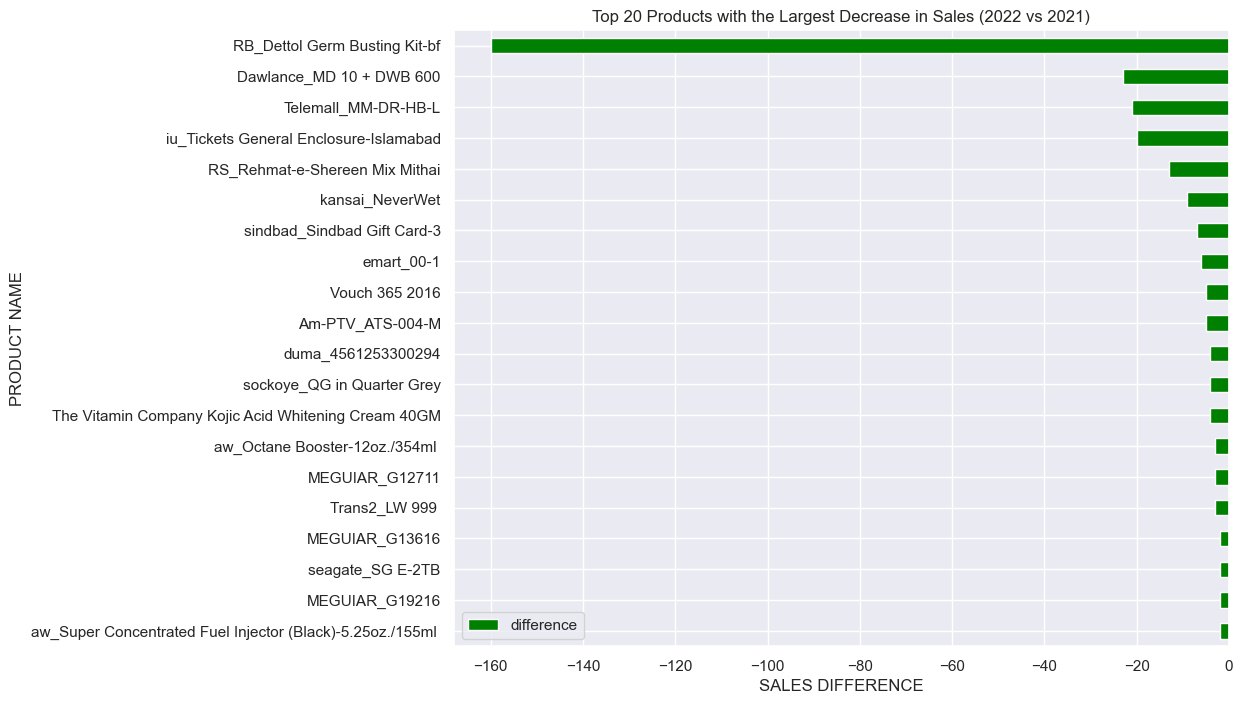

In [20]:
df_others_21_22= df_others_21_22.head(20)
df_others_21_22.sort_values(by='difference', ascending= False, inplace= True)

sns.set()
df_others_21_22.plot(x='sku_name',\
                  y='difference',\
                  kind='barh',\
                  figsize=(10,8),\
                  color='green')
plt.title('Top 20 Products with the Largest Decrease in Sales (2022 vs 2021)')
plt.ylabel('PRODUCT NAME')
plt.xlabel('SALES DIFFERENCE')

In [21]:
df = pd.concat([df,df_others_21_22], ignore_index=True)

In [22]:
df['category'] = df['category'].replace('', 'other')  # Replace empty strings
df['category'] = df['category'].fillna('other') 

In [23]:
file_path=r"C:\Users\Admin\Downloads\output_folder\final_set\sales.csv"

df.to_csv(file_path,index= False)
print(f'File save to {file_path}' )

File save to C:\Users\Admin\Downloads\output_folder\final_set\sales.csv


In [24]:
df

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,cogs,category,registered_date,payment_meathod,purchase_count,qty_ordered_2021,qty_ordered_2022,difference,percent_change,remark
0,ODR1111336599a,C993531L,2022-02-23,P569750,62002.0,1.0,62002.0,0.0,62002.0,1.0,...,51156.0,Home & Living,2021-11-08,jazzwallet,1.0,NaN,NaN,NaN,NaN,NaN
1,ODR1116457650x,C517907L,2022-10-08,P320550,159500.0,1.0,159500.0,0.0,159500.0,1.0,...,97266.0,Health & Sports,2022-08-15,cod,1.0,NaN,NaN,NaN,NaN,NaN
2,ODR1119282607l,C192625L,2021-08-07,P146984,919300.0,1.0,919300.0,0.0,919300.0,1.0,...,671060.0,Entertainment,2021-07-27,ublcreditcard,NaN,NaN,NaN,NaN,NaN,NaN
3,ODR1119964698b,C225180L,2021-08-11,P523149,59856.0,1.0,59856.0,0.0,59856.0,1.0,...,53824.0,Beauty & Grooming,2021-10-11,cod,NaN,NaN,NaN,NaN,NaN,NaN
4,ODR1120310291y,C708473L,2021-09-18,P692619,34510.0,1.0,34510.0,0.0,34510.0,1.0,...,29290.0,Books,2021-07-02,cod,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5779,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,other,NaT,NaN,NaN,13.0,0.0,-13.0,-100.0,DOWN
5780,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,other,NaT,NaN,NaN,20.0,0.0,-20.0,-100.0,DOWN
5781,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,other,NaT,NaN,NaN,23.0,2.0,-21.0,100.0,UP
5782,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,other,NaT,NaN,NaN,23.0,0.0,-23.0,-100.0,DOWN
